<a href="https://colab.research.google.com/github/Prasanna2000/final-year-project/blob/main/Forest_Fire_Detection_Presentable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Prasanna Rahavendra A](https://github.com/Prasanna2000) , [Praneash GP](https://github.com/praneash456) , [Rashmika T]()

In [ ]:
!unzip "/content/drive/MyDrive/Project/project-dataset-forest-fire.zip" -d "/content/data"

# Web Scraping and Image Pre-Processing:

In [ ]:
# web scraping code: https://github.com/Prasanna2000/final-year-project/tree/main/web%20scraping

In [4]:
# Preprocessing and loading:

# classes: 0 if fire, 1 if not fire

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

train_data = []
train_labels = []

test_data = []
test_labels = []

img_ht = 192
img_wt = 192
train_dir = "/content/data/Data/Train_Data"
test_dir = "/content/data/Data/Test_Data"

for cls in ["Fire", "Non_Fire"]:
  for img in os.listdir(train_dir + "/" + cls):
    image = cv2.imread(train_dir + "/" + cls + "/" + img)
    if image is not None:
      image = cv2.resize(image, (img_ht, img_wt))
      train_data.append(image)
      train_labels.append(0 if cls=="Fire" else 1)

train_dir = "/content/data/Data/Train_Data"
for cls in ["Fire", "Non_Fire"]:
  for img in os.listdir(test_dir + "/" + cls):
    image = cv2.imread(test_dir + "/" + cls + "/" + img)
    if image is not None:
      image = cv2.resize(image, (img_ht, img_wt))
      test_data.append(image)
      test_labels.append(0 if cls=="Fire" else 1)

print(len(train_data), len(train_labels))
print(len(test_data), len(test_labels))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

4609 4609
50 50


# Model Building (Training and Validation)

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Activation

In [6]:
data_dir = "/content/data/Data/"
train_dir = data_dir+"Train_Data/"
test_dir = data_dir+"Test_Data/"

img_height = 192
img_width = 192
batch_size = 64

### Model Flow:
<br/>
Input Layer &rarr; MobileNetV2 &rarr; Custom Layers &rarr; Activation &rarr; Output

In [8]:
mobilenet = tf.keras.applications.MobileNetV2(weights="imagenet", input_shape=(img_width,img_height,3), include_top=False)

mobilenet.trainable = False

model = tf.keras.Sequential([
        mobilenet,
        Flatten(),
        Dense(512, kernel_regularizer="l1"),
        Dense(256, kernel_regularizer="l1"),
        Dense(128, kernel_regularizer="l1"),
        Dense(1, kernel_regularizer="l1"),
        Activation("sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

# print(mobilenet.summary())
# print(model.summary())

### Model Architecture:

MobileNet Model:


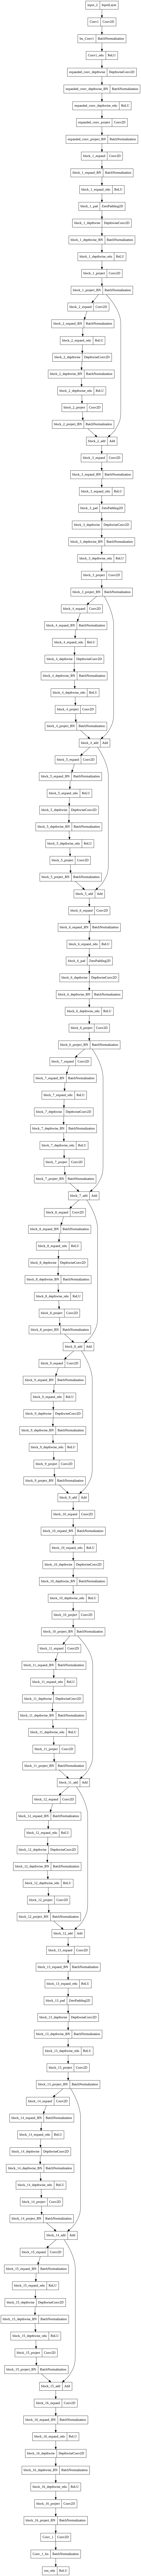

In [24]:
print("MobileNet Model:")
tf.keras.utils.plot_model(mobilenet, to_file='/content/mobilenet.png')


Custom Model:


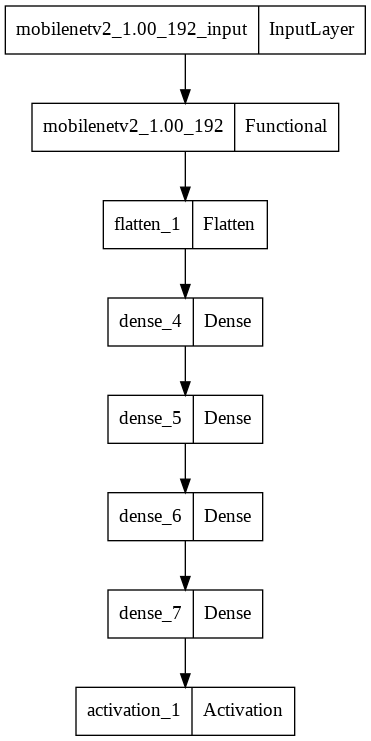

In [23]:
print("Custom Model:")
tf.keras.utils.plot_model(model, to_file='/content/model.png')


### Model Training for pre-determined number of iterations (Epochs):

In [9]:
history = model.fit(train_data, train_labels, validation_split = 0.2, epochs=20)

Epoch 1/20
116/116 [==============================] - 20s 61ms/step - loss: 502.2589 - accuracy: 0.7678 - val_loss: 106.3663 - val_accuracy: 0.7050
Epoch 2/20
116/116 [==============================] - 6s 51ms/step - loss: 79.1792 - accuracy: 0.8088 - val_loss: 64.2485 - val_accuracy: 0.6714
Epoch 3/20
116/116 [==============================] - 6s 52ms/step - loss: 56.2239 - accuracy: 0.7860 - val_loss: 48.9787 - val_accuracy: 0.8460
Epoch 4/20
116/116 [==============================] - 6s 49ms/step - loss: 43.0386 - accuracy: 0.8223 - val_loss: 37.1794 - val_accuracy: 0.9664
Epoch 5/20
116/116 [==============================] - 6s 50ms/step - loss: 32.5975 - accuracy: 0.8552 - val_loss: 28.5231 - val_accuracy: 0.5803
Epoch 6/20
116/116 [==============================] - 6s 49ms/step - loss: 24.5604 - accuracy: 0.8644 - val_loss: 21.2674 - val_accuracy: 0.8818
Epoch 7/20
116/116 [==============================] - 6s 49ms/step - loss: 18.8804 - accuracy: 0.8834 - val_loss: 16.9578 - val

### Results:

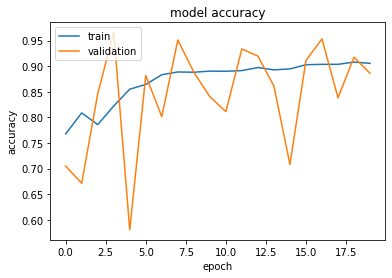

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

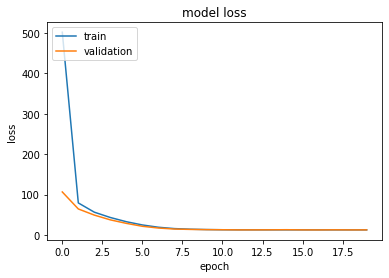

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    print("CONFUSION MATRIX:")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.74      0.80      0.77        25

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50




CONFUSION MATRIX:


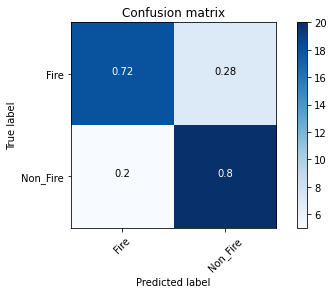

In [19]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

raw_pred = model.predict(test_data)
y_pred = []

for i in raw_pred:
  y_pred.append(0 if i<0.5 else 1)

print("CLASSIFICATION REPORT:")
print(classification_report(test_labels, y_pred))

print("\n\n")
conf_mat = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(conf_mat, classes=["Fire", "Non_Fire"], normalize=True)

In [21]:
model.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 30ms/step - loss: 12.6070 - accuracy: 0.7600


[12.60699462890625, 0.7599999904632568]

### Sample Predictions

In [35]:
classes = {0:"Fire", 1:"No Fire"}

Image 1 prediction:  Fire


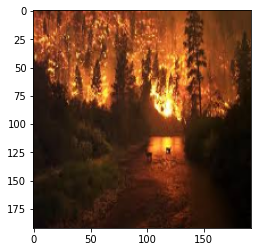

In [41]:
raw_img1 = cv2.resize(cv2.imread("/content/data/Data/Test_Data/Fire/F_12.jpg"), (192,192))
image_fire = np.expand_dims(raw_img1, axis=0)

pred = 0 if model.predict(image_fire) < 0.5 else 1

print("Image 1 prediction: ", classes[pred])
plt.imshow(cv2.cvtColor(raw_img1, cv2.COLOR_BGR2RGB))

plt.show()

Image 2 prediction:  No Fire


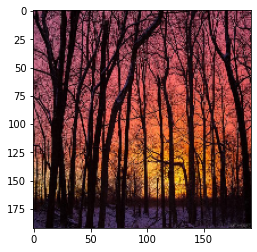

In [38]:
raw_img2 = cv2.resize(cv2.imread("/content/data/Data/Test_Data/Non_Fire/NF_17.jpg"), (192,192))

image_nofire = np.expand_dims(raw_img2, axis=0)
pred = 0 if model.predict(image_nofire) < 0.5 else 1
print("Image 2 prediction: ", classes[pred])
plt.imshow(cv2.cvtColor(raw_img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
# model.save("/content/drive/MyDrive/Project/Model_Train90_Val88_Test76")